In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
import sys

import numpy as np

sys.path.append('.')
from Joint_iGraph import joint_layout
import networkx as nx
import pandas as pd
from networkx.drawing.layout import fruchterman_reingold_layout


#todo need to generate two random graph and test the similarity of their graphs
p = "/Users/ekarimi/PycharmProjects/Joint_iGraph/"

human = pd.read_csv(p+"adj.txt")
mouse = pd.read_csv(p+"adj_test.txt")

human.index = human.columns.values
mouse.index = mouse.columns.values
shared = set(mouse.columns).intersection(set(human.columns))

human = human[shared]
human = human.loc[list(shared)]

mouse = mouse[shared]
mouse = mouse.loc[list(shared)]

A1 = human.values
A2 = mouse.values

pos1, pos2 = joint_layout(A1,A2, factor=0.4)



2


In [25]:
human[list(shared)].loc[list(shared)]

,NTRK1,MCM7,HEY1,IGFBP1,SCNN1A,CD34,FOXO1,NFKBIA,KRT8,SPP1,...,COL4A1,EPHX2,AURKB,CCNB1,APOE,KRT19,EPHX1,DDIT3,CSF2,UBP1
NTRK1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MCM7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HEY1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IGFBP1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCNN1A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KRT19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPHX1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DDIT3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CSF2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
mouse[list(shared)].loc[list(shared)]

,NTRK1,MCM7,HEY1,IGFBP1,SCNN1A,CD34,FOXO1,NFKBIA,KRT8,SPP1,...,COL4A1,EPHX2,AURKB,CCNB1,APOE,KRT19,EPHX1,DDIT3,CSF2,UBP1
NTRK1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MCM7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HEY1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IGFBP1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCNN1A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KRT19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EPHX1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DDIT3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CSF2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
def make_graph(A1, shared):
    g = nx.Graph()
    genes = list(shared)
    for i in range(A1.shape[0]):
        for j in range(A1.shape[1]):
            if A1[i,j] > 0.0:
                g.add_edge(genes[i], genes[j], weight=A1[i,j])

    for q in list(shared- set(list(g))):
        g.add_node(q)
    
    return g

In [28]:
g1 = make_graph(A1, shared)
g2 = make_graph(A2, shared)
genes = list(shared)

In [29]:
pos = dict()
for i in range(len(genes)):
    pos[genes[i]] = pos1[i]
pos1 = pos
pos = dict()
for i in range(len(genes)):
    pos[genes[i]] = pos2[i]
pos2 = pos

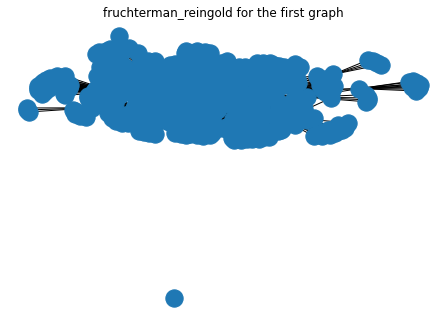

In [30]:
# nx.draw(g1, with_labels=True, pos=nx.fruchterman_reingold_layout(g1))
nx.draw(g1, pos=nx.fruchterman_reingold_layout(g1))
plt.title("fruchterman_reingold for the first graph")
plt.show()

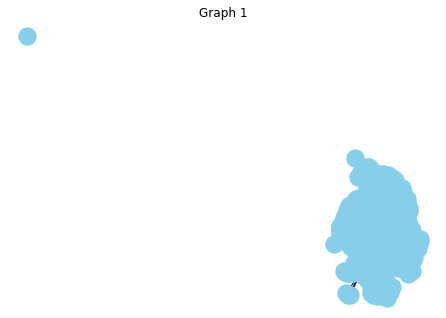

In [31]:
# nx.draw(g1, with_labels=True, node_color="skyblue", pos=pos1, )
nx.draw(g1, node_color="skyblue", pos=pos1, )
plt.title("Graph 1")
plt.show()

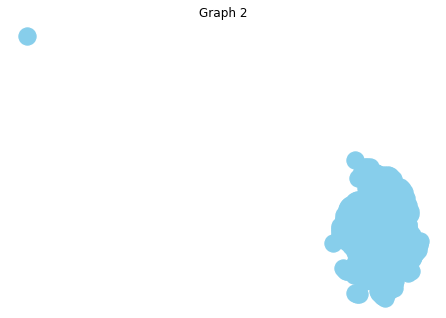

In [32]:
# nx.draw(g2, with_labels=True, node_color="skyblue", pos=pos2)
nx.draw(g2, node_color="skyblue", pos=pos2)
plt.title("Graph 2")
plt.show()